In [1]:
import keras
from keras.preprocessing.text import Tokenizer, one_hot, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Bidirectional, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import TransformerMixin
from sklearn.base import BaseEstimator
import numpy as np

import numpy as np

from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras import optimizers
from keras import regularizers

import sys

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
import numpy as np
# Using keras to load the dataset with the top_words
top_words = 10000
max_review_length = 900
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

Using TensorFlow backend.


In [2]:
X_train = X_train[1:2000,]
y_train = y_train[1:2000,]

X_test = X_test[1:500,]
y_test = y_test[1:500,]

In [3]:
from tensorflow import set_random_seed
set_random_seed(2)
from deepexplain.tensorflow import DeepExplain
from keras.layers import Activation
from keras import backend as K
max_review_length = 900
current_session = K.get_session() 

with DeepExplain(session=current_session) as de:  # <-- init DeepExplain context
    from numpy.random import seed
    seed(1)
    from tensorflow import set_random_seed
    set_random_seed(2)
    embedding_vecor_length = 300
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
    model.add(Convolution1D(64, 3, padding='same'))
    model.add(Convolution1D(32, 3, padding='same'))
    model.add(Convolution1D(16, 3, padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(180,activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=3)    


   # predict on test data
    y_pred = model.predict(np.array(X_test));
    y_test = np.array(y_test);
    
    # Evaluate the embedding tensor on the model input (in other words, perform the lookup)
    embedding_tensor = model.layers[0].output
    input_tensor = model.inputs[0]
    embedding_out = current_session.run(embedding_tensor, {input_tensor: X_test});

    xs = X_test;
    ys = y_test;
    # Run DeepExplain with the embedding as input
    attributions = de.explain('elrp', model.layers[-1].output * ys, model.layers[1].input, embedding_out);
    print("attributions shape --- {}".format(attributions.shape));

Epoch 1/3
1999/1999 [==============================] - 2s 1ms/step - loss: 0.7127 - acc: 0.5253
Epoch 2/3
1999/1999 [==============================] - 1s 363us/step - loss: 0.2234 - acc: 0.9080
Epoch 3/3
1999/1999 [==============================] - 1s 366us/step - loss: 0.0159 - acc: 0.9985
DeepExplain: running "elrp" explanation method (4)
Model with multiple inputs:  False
attributions shape --- (499, 900, 300)


In [4]:
####Sums the attributions since the original attributions are in the context of word embeddings (499, 900, 300) --> (499,900)
import numpy as np 
sum_attributions = np.sum(attributions, -1)
sum_attributions[11].shape

(900,)

In [13]:
X_test[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
import matplotlib.pyplot as plt
###attribution shape corresponds to max review length 
first_all_test = sum_attributions[3]
first_all_test.shape

a = first_all_test
s = int(np.sqrt(first_all_test.size))
b = first_all_test.reshape(s, s)

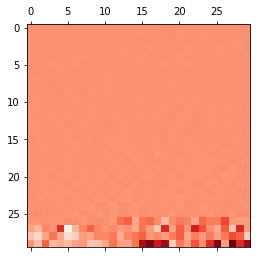

In [17]:

#plots as nxn array of the original
plt.matshow(b, cmap=plt.cm.Reds)
plt.show()